In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
%matplotlib inline

## Figure和Subplot
matplotlib的图像都位于Figure对象中。

In [2]:
fig = plt.figure() # Creates a new figure.

plt.figure有一些选项，特别是figsize，它用于确保当图片保存到磁盘是具有一定的大小和纵横比。  
不能通过空Figure绘图，必须用add_subplot创建一个或多个subplot才行：

In [3]:
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

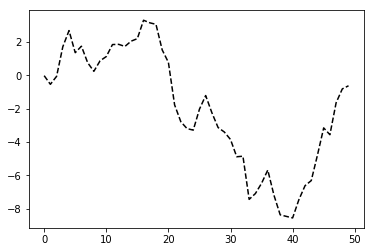

In [4]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

plt.subplots(nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)  
sharex:所有subplot应该使用相同的X轴刻度（调节xlim将会影响所有subplot）  
sharey:所有subplot应该使用相同的Y轴刻度（调节ylim将会影响所有subplot）

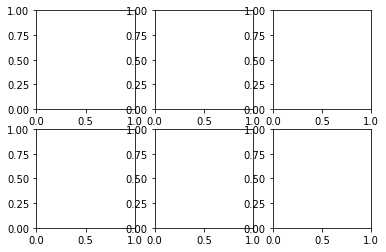

In [5]:
fig, axes = plt.subplots(2, 3)

In [6]:
axes # 含有已创建的subplot对象的NumPy数组

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000216F1C52C50>,
      dtype=object)

## 调整subplot周围的间距
默认情况下，matplotlib会在subplot外围留下一定的边距，并在subplot之间留下一定的间距。利用Figure的subplots_adjust方法可以轻而易举地修改间距，此外，他也是个顶级函数：  
```
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
```
wspace和hspace用于控制宽度和高度的百分比，可以用作subplot之间的间距。

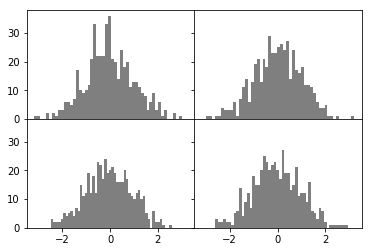

In [7]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

## 颜色、标记和线型

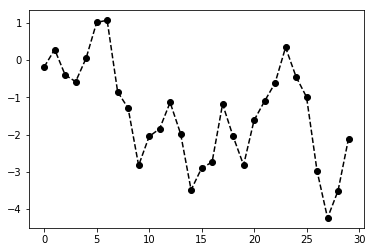

In [8]:
# 简写：plt.plot(randn(30).cumsum(), 'ko--')
plt.plot(np.random.randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

在线型图中，非实际数据点默认是按线性方式插值的。可以通过drawstyle选项修改：

In [9]:
data = np.random.randn(30).cumsum()

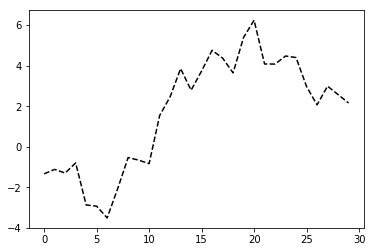

In [10]:
plt.plot(data, 'k--', label='Default')

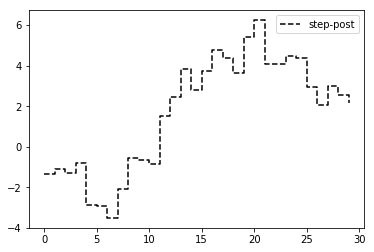

In [11]:
plt.plot(data, 'k--', drawstyle='steps-post', label='step-post')
plt.legend(loc='best')

## 刻度、标签和图例

### 设置标题、轴标签、刻度以及刻度标签

为了说明轴的定义，创建一个简单的图像并绘制一段随机漫步：

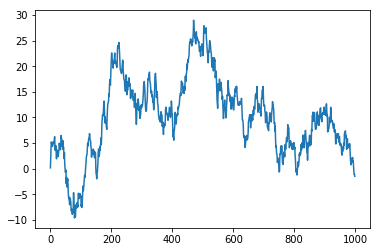

In [12]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

要修改X轴的刻度，最简单的办法是使用set_xticks和set_xticklabels。  前者告诉matplotlib要将刻度放在数据范围中的哪些位置，默认情况下，这些位置也就是刻度标签。但我们可以通过set_xticklabels将任何其他的值用作标签：

Text(0.5,0,'Stages')

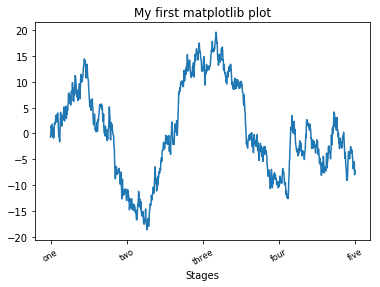

In [13]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

### 添加图例
图例（legend）是另一种用于标识图表元素的重要工具。

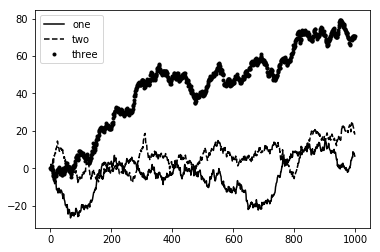

In [14]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum(), 'k', label='one')
ax.plot(np.random.randn(1000).cumsum(), 'k--', label='two')
ax.plot(np.random.randn(1000).cumsum(), 'k.', label='three')
# ax.legend(loc='best')
plt.legend()

要从图例中去除一个或多个元素，不传入label或传入label='_nolegend_'即可。

## 注解以及在Subplot上绘图
除标准的图表对象之外，你可能还希望绘制一些自定义的注解（比如文本、箭头或其他图形等）。

In [15]:
from datetime import datetime

Text(0.5,1,'Important dates in 2008-2009 financial crisis')

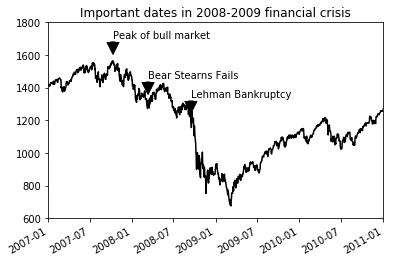

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# index_col=0将第一列作为index列，parse_dates=True尝试解析索引
data = pd.read_csv('spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']
spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50), # Series.asof(where, subset=None)返回不是None的值
                xytext=(date, spx.asof(date) + 200),
                arrowprops=dict(facecolor='black'),
                horizontalalignment='left', verticalalignment='top')
# 放大到2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])    

ax.set_title('Important dates in 2008-2009 financial crisis')

matplotlib有一些表示常见图形的对象。这些对象被称为块（patch）。
要在图表中添加一个图形，需要创建一个块对象shp，然后通过ax.add_patch(shp)将其添加到subplot中：

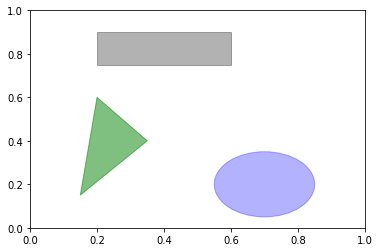

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

## 将图表保存到文件
利用plt.savefig可以将当前图表保存到文件。  
dpi（控制“每英寸点数”分辨率）  
bbox_inches（可以剪除当前图表周围的空白部分）  
要得到一张带有最小白边且分辨率为400DPI的PNG图片，你可以：
```plt.savefig('figpath.png', dpi=400, bbox_inches='tight')```
savefig并非一定要写入磁盘，也可以写入任何文件类型的对象，比如StringIO：
```
from io import StringIO
buffer = StringIo()
plt.savefig(buffer)
plot_data = buffer.getvalue()
```

## 线型图

In [18]:
s = Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))

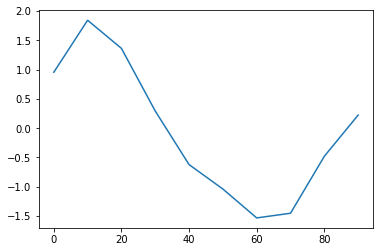

In [19]:
s.plot()

In [20]:
df = DataFrame(np.random.randn(10, 4).cumsum(0),
               columns=['A', 'B', 'C', 'D'],
               index=np.arange(0, 100, 10))

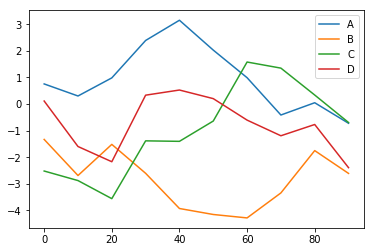

In [21]:
df.plot()

## 柱状图
在生成线型图的代码中加上kind='bar'（垂直柱状图）或kind='barh'（水平柱状图）即可生成柱状图。  
这时Series和DataFrame的索引将会被用作X（bar）或Y（barh）刻度：

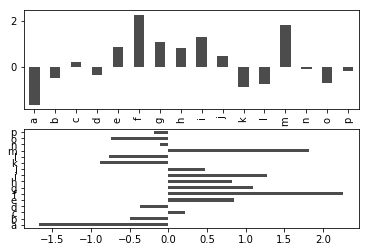

In [22]:
fig, axes = plt.subplots(2, 1)
data = Series(np.random.randn(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)

data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)

对于DataFrame，柱状图会将每一行的值分为一组

In [23]:
df = DataFrame(np.random.rand(6, 4),
               index=['one', 'two', 'three', 'four', 'five', 'six'],
               columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

In [24]:
df

Genus         A         B         C         D
one    0.411227  0.115042  0.448970  0.983614
two    0.913131  0.866014  0.823790  0.689225
three  0.590143  0.963737  0.988147  0.520107
four   0.288856  0.642688  0.700745  0.892155
five   0.752158  0.373780  0.223204  0.261069
six    0.413399  0.465690  0.048459  0.972035

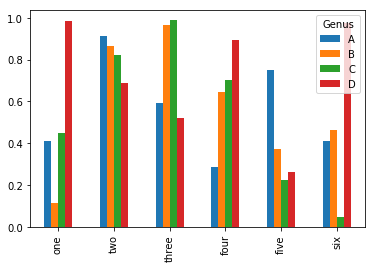

In [25]:
df.plot(kind='bar')

设置stacked=True即可为DataFrame生成堆积柱状图，这样每行的值就会被堆积在一起：

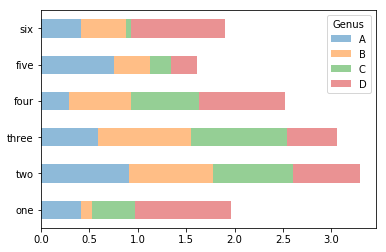

In [26]:
df.plot(kind='barh', stacked=True, alpha=0.5)

In [27]:
tips = pd.read_csv('tips.csv')

In [28]:
# 如果通过tips.size,取到的是一整列的和
party_counts = pd.crosstab(tips.day, tips['size'])

In [29]:
party_counts

size  1   2   3   4  5  6
day                      
Fri   1  16   1   1  0  0
Sat   2  53  18  13  1  0
Sun   0  39  15  18  3  1
Thur  1  48   4   5  1  3

In [30]:
# 1个人和6个人的聚会都比较少
party_counts = party_counts.ix[:, 2:5]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


然后进行规格化，使得各行的和为1（必须转换成浮点数，避免整数除法问题）：

In [31]:
# 规格化成“和为1”
party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis=0)

In [32]:
party_pcts

size         2         3         4         5
day                                         
Fri   0.888889  0.055556  0.055556  0.000000
Sat   0.623529  0.211765  0.152941  0.011765
Sun   0.520000  0.200000  0.240000  0.040000
Thur  0.827586  0.068966  0.086207  0.017241

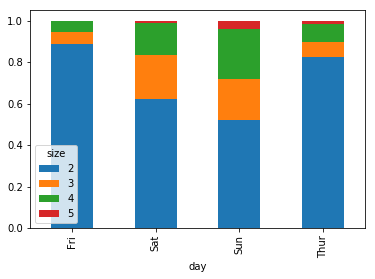

In [33]:
party_pcts.plot(kind='bar', stacked=True)

##  直方图和密度图
直方图（histogram）是一种可以对值频率进行离散化显示的柱状图。数据点被拆分到离散的、间隔均匀的面元中，绘制的是各面元中数据的数量。

In [34]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']

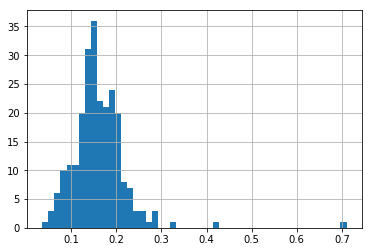

In [35]:
tips['tip_pct'].hist(bins=50)

与此相关的一种图表类型是密度图，它是通过计算“可能会产生观测数据的连续概率分布的估计”而产生的。一般的过程是将该分布近似为一组核（即诸如正态（高斯）分布之类的较为简单的分布）。因此，密度图也被称作KDE（Kernel Density Estimate，核密度估计）图。调用plot时加上kind='kde'即可生成一张密度图（标准混合正态分布KDE）：

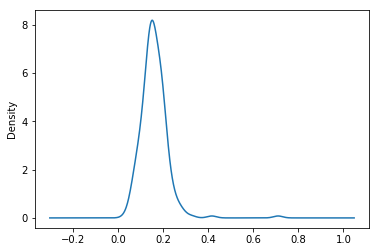

In [36]:
tips['tip_pct'].plot(kind='kde')

这两种图表常常会被画在一起。直方图以规格化形式给出（以便给出面元化密度），然后再在其上绘制核密度估计。  
接下来来看一个由两个不同的标准正态分布组成的双峰分布：

In [37]:
com1 = np.random.normal(0, 1, size=200) # N(0, 1)

In [38]:
com2 = np.random.normal(10, 2, size=200) # (10, 4)

In [39]:
values = Series(np.concatenate([com1, com2]))

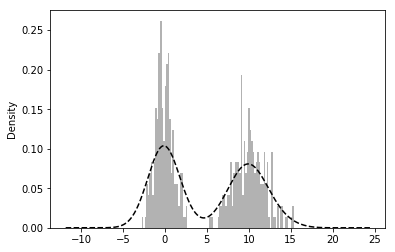

In [40]:
values.hist(bins=100, alpha=0.3, color='k', normed=True)
values.plot(kind='kde', style='k--')

## 散布图
散布图（scatter plot）是观察两个一维数据序列之间的关系的有效手段。

In [41]:
macro = pd.read_csv('macrodata.csv')

In [42]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

In [43]:
trans_data = np.log(data).diff().dropna() # df.diff即df.shift与df做差

In [44]:
trans_data.tail()

cpi        m1  tbilrate     unemp
198 -0.007904  0.045361 -0.396881  0.105361
199 -0.021979  0.066753 -2.277267  0.139762
200  0.002340  0.010286  0.606136  0.160343
201  0.008419  0.037461 -0.200671  0.127339
202  0.008894  0.012202 -0.405465  0.042560

Text(0.5,1,'Changes in log m1 vs. log unemp')

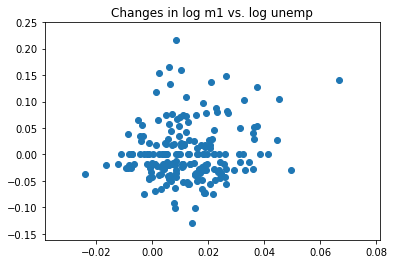

In [45]:
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))

在探索式数据分析工作中，同时观察一组变量的散布图是很有意义的，这也被称为散布图矩阵（scatter plot matrix）。  
纯手工创建这样的图表很费工夫，所以pandas提供了一个能从DataFrame创建散布图矩阵的scatter_matrix函数。它还支持在对角线上放置各变量的直方图或密度图：

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000216F531F2B0>,
      dtype=object)

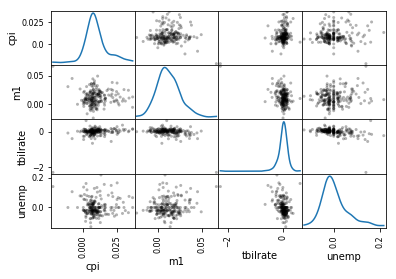

In [46]:
# 改用pandas.plotting.scatter_matrix来代替
pd.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)

## 绘制地图：图形化显示海地地震危机数据

In [47]:
data = pd.read_csv('Haiti.csv')

In [48]:
data.head()

Serial                                     INCIDENT TITLE  \
0    4052  * URGENT * Type O blood donations needed in #J...   
1    4051                     Food-Aid sent to Fondwa, Haiti   
2    4050  how haiti is right now and how it was during t...   
3    4049                                        Lost person   
4    4042                                 Citi Soleil school   

      INCIDENT DATE            LOCATION  \
0  05/07/2010 17:26       Jacmel, Haiti   
1  28/06/2010 23:06              fondwa   
2  24/06/2010 16:21             centrie   
3  20/06/2010 21:59              Genoca   
4  18/05/2010 16:26  Citi Soleil, Haiti   

                                         DESCRIPTION  \
0  Birthing Clinic in Jacmel #Haiti urgently need...   
1  Please help food-aid.org deliver more food to ...   
2  i feel so bad for you i know i am supposed to ...   
3  We are family members of Juan Antonio Zuniga O...   
4  We are working with Haitian (NGO) -The Christi...   

                                            CATEGORY   LATITUDE   LONGITUDE  \
0        1. Urgences | Emergency, 3. Public Health,   18.233333  -72.533333   
1  1. Urgences | Emergency, 2. Urgences logistiqu...  50.226029    5.729886   
2  2. Urgences logistiques | Vital Lines, 8. Autr...  22.278381  114.174287   
3                          1. Urgences | Emergency,   44.407062    8.933989   
4                          1. Urgences | Emergency,   18.571084  -72.334671   

  APPROVED VERIFIED  
0      YES       NO  
1       NO       NO  
2       NO       NO  
3       NO       NO  
4      YES       NO

每一行表示一条从某人的手机上发送的紧急或其他问题的报告。每条报告都有一个时间戳和位置（经度和纬度）

In [49]:
data[['INCIDENT DATE', 'LATITUDE', 'LONGITUDE']][:10]

INCIDENT DATE   LATITUDE   LONGITUDE
0  05/07/2010 17:26  18.233333  -72.533333
1  28/06/2010 23:06  50.226029    5.729886
2  24/06/2010 16:21  22.278381  114.174287
3  20/06/2010 21:59  44.407062    8.933989
4  18/05/2010 16:26  18.571084  -72.334671
5  26/04/2010 13:14  18.593707  -72.310079
6  26/04/2010 14:19  18.482800  -73.638800
7  26/04/2010 14:27  18.415000  -73.195000
8  15/03/2010 10:58  18.517443  -72.236841
9  15/03/2010 11:00  18.547790  -72.410010

CATEGORY字段含有一组以逗号分隔的代码，这些代码表示消息的类型：

In [50]:
data['CATEGORY'][:6]

0          1. Urgences | Emergency, 3. Public Health, 
1    1. Urgences | Emergency, 2. Urgences logistiqu...
2    2. Urgences logistiques | Vital Lines, 8. Autr...
3                            1. Urgences | Emergency, 
4                            1. Urgences | Emergency, 
5                       5e. Communication lines down, 
Name: CATEGORY, dtype: object

只要仔细观察一下上面这个数据摘要，就能发现有些分类信息缺失了。因此我们需要丢弃这些数据点。此外调用describe还能发现数据中存在一些异常的地理位置：

In [51]:
data.describe()

Serial     LATITUDE    LONGITUDE
count  3593.000000  3593.000000  3593.000000
mean   2080.277484    18.611495   -72.322680
std    1171.100360     0.738572     3.650776
min       4.000000    18.041313   -74.452757
25%    1074.000000    18.524070   -72.417500
50%    2163.000000    18.539269   -72.335000
75%    3088.000000    18.561820   -72.293570
max    4052.000000    50.226029   114.174287

清除错误位置信息并移除缺失分类信息是一件很简单的事情：

In [52]:
data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20) &
            (data.LONGITUDE > -75) & (data.LONGITUDE < -70)
            & data.CATEGORY.notnull()]

现在，我们想根据分类对数据做一些分析或图形化工作，但是各个分类字段中可能含有多个分类。此外，各个分类信息不仅有一个编码，还有一个英文名称（可能还有一个法语名称）。因此需要对数据做一些规整化处理。  
首先，我编写了两个函数，一个用于获取所有分类的列表，另一个用于将各个分类信息拆分为编码和英语名称：

In [53]:
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

In [54]:
def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets)) # set.union()并集

In [55]:
def get_english(cat):
    code, names = cat.split('.')
    if '|' in names:
        names = names.split('|')[1]
    return code, names.strip()

你可以测试一下get_english函数是否工作正常：

In [56]:
get_english('2. Urgences logistiques | Vital Lines')

('2', 'Vital Lines')

接下来，我做了一个将编码跟名称映射起来的字典，这是因为我们等会要用编码进行分析。

In [57]:
all_cats = get_all_categories(data.CATEGORY)

In [58]:
# 生成器表达式
english_mapping = dict(get_english(x) for x in all_cats)

In [59]:
english_mapping['2a']

'Food Shortage'

In [60]:
english_mapping['6c']

'Earthquake and aftershocks'

根据分类选取记录的方式有很多，其中之一是添加指标（或哑变量）列，每个分类一列。为此我们首先抽取出唯一的分类编码，并构造一个全零DataFrame（列为分类编码，索引跟data的索引一样）：

In [61]:
def get_code(seq):
    return [x.split('.')[0] for x in seq if x]

In [62]:
all_codes = get_code(all_cats)

In [63]:
code_index = pd.Index(np.unique(all_codes))

In [64]:
dummy_frame = DataFrame(np.zeros((len(data), len(code_index))),
                        index=data.index,
                        columns=code_index)

In [65]:
dummy_frame.iloc[:, :6].tail()

1   1a   1b   1c   1d    2
3588  0.0  0.0  0.0  0.0  0.0  0.0
3589  0.0  0.0  0.0  0.0  0.0  0.0
3590  0.0  0.0  0.0  0.0  0.0  0.0
3591  0.0  0.0  0.0  0.0  0.0  0.0
3592  0.0  0.0  0.0  0.0  0.0  0.0

现在应该将各行中适当的项设置为1，然后再与data进行连接：

In [66]:
for row, cat in zip(data.index, data.CATEGORY):
    codes = get_code(to_cat_list(cat))
    dummy_frame.ix[row, codes] = 1

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [67]:
data = data.join(dummy_frame.add_prefix('category_'))

In [68]:
data.ix[:, 10:15].head()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


category_1  category_1a  category_1b  category_1c  category_1d
0         1.0          0.0          0.0          0.0          0.0
4         1.0          0.0          0.0          0.0          0.0
5         0.0          0.0          0.0          0.0          0.0
6         0.0          0.0          0.0          0.0          0.0
7         0.0          0.0          0.0          0.0          0.0

basemap工具集（matplotlib的一个插件）使得我们能够用Python在地图上绘制2D数据。basemap提供了许多不同的地球投影以及一种将地球上的经纬度坐标投影转换为二维matplotlib图的方式。